In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as st

In [42]:
dd=pd.read_csv(r'F:\VIRU\New folder\denmark.csv')

In [43]:
dd.head()

,months,sales
0,2014-01,18
1,2014-02,14
2,2014-03,79
3,2014-04,15
4,2014-05,32


In [44]:
dd.tail()

,months,sales
79,2020-08,265
80,2020-09,879
81,2020-10,28
82,2020-11,349
83,2020-12,1644


In [45]:
dd['months']=pd.to_datetime(dd['months'])

In [46]:
dd.set_index('months',inplace=True)

In [47]:
dd.head()

,sales
months,
2014-01-01,18
2014-02-01,14
2014-03-01,79
2014-04-01,15
2014-05-01,32


<AxesSubplot:xlabel='months'>

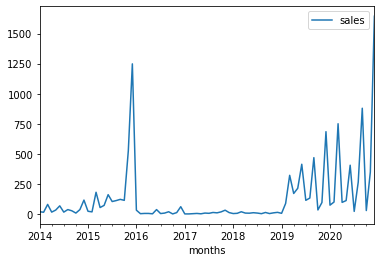

In [48]:
dd.plot()

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
dfuler = adfuller(dd['sales'])

In [51]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(-0.33942139377773006,
 0.9197325424754486,
 9,
 74,
 {'1%': -3.5219803175527606,
  '5%': -2.9014701097664504,
  '10%': -2.58807215485756},
 979.57774534676)

In [52]:
import statsmodels.api as sm

In [53]:

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

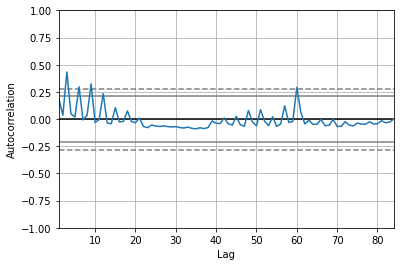

In [54]:
autocorrelation_plot(dd['sales'])
pyplot.show()

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

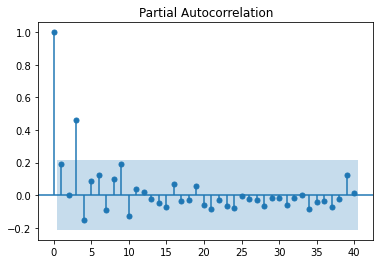

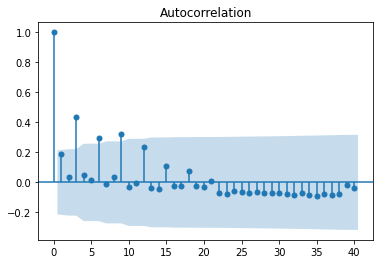

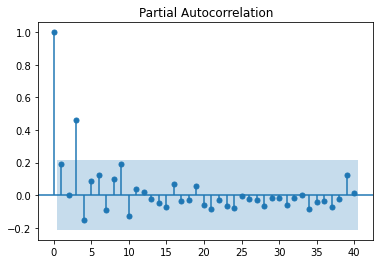

In [56]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=40)

In [57]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

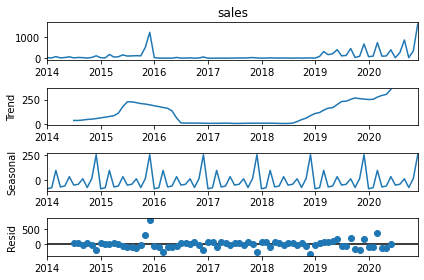

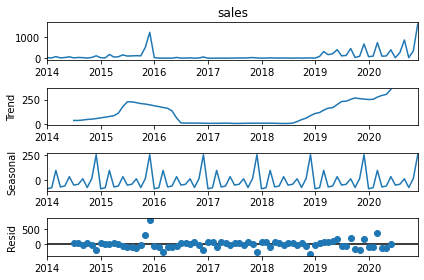

In [58]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [59]:
import statsmodels.api as sm

In [60]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(8,0,0),seasonal_order=(2,0,0,12))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [61]:
dd['forecast']=results.predict(start=74,end=84,dynamic=True)

<AxesSubplot:xlabel='months'>

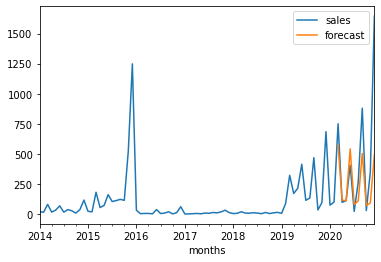

In [62]:
dd[['sales','forecast']].plot()

In [63]:
output=results.forecast(24)

In [64]:
output

2021-01-01     507.648325
2021-02-01     235.053999
2021-03-01    1090.621031
2021-04-01     336.304604
2021-05-01     237.070763
2021-06-01     962.320181
2021-07-01     265.241997
2021-08-01     273.166959
2021-09-01     971.686515
2021-10-01     279.243125
2021-11-01     261.367188
2021-12-01     969.691381
2022-01-01     320.155875
2022-02-01     237.476913
2022-03-01     798.590728
2022-04-01     269.474364
2022-05-01     224.402789
2022-06-01     743.637309
2022-07-01     246.272567
2022-08-01     204.165406
2022-09-01     637.994006
2022-10-01     230.521055
2022-11-01     183.458970
2022-12-01     511.820164
Freq: MS, Name: predicted_mean, dtype: float64

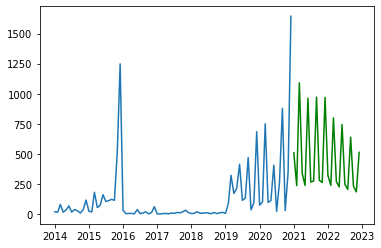

In [65]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='green')

In [66]:
from pandas.tseries.offsets import DateOffset

In [67]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [68]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [69]:
future_dates_dd.tail()

,sales,forecast
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN


In [70]:
future_dd=pd.concat([dd,future_dates_dd])

In [71]:
future_dd['forecast']=results.predict(start=82,end=107,dynamic=True)

<AxesSubplot:>

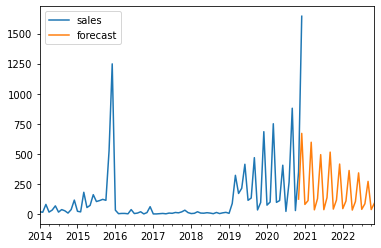

In [72]:
future_dd[['sales','forecast']].plot()